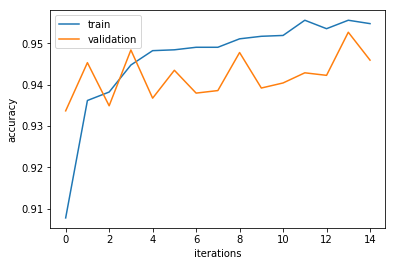

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

NUMBER_OF_ITERATION = 15
def get_labels(k):
   label = ['label']
   for i in range(1,k+1):
       label.append(str(i))
   return label
def add_bias(data):
   data['785'] = np.array([1]*data.shape[0])
   return data
def kp(x,y,p=1):
   value = 1 + np.matmul(x,np.transpose(y))
   value = np.power(value,p)
   return value
def get_Y_and_X(data):
   y = data['label'].apply(lambda x: 1 if x==3 else -1)
   x = data.drop(['label'],1)
   return x,y

train_df,Y = get_Y_and_X(add_bias(pd.read_csv('pa2_train.csv',names=get_labels(784))))

df = pd.read_csv("pa2_train.csv");
# df.columns = [str(i) for i in range(0, df.shape[1])]
df2 = pd.read_csv("pa2_valid.csv");
df2.columns = [str(i) for i in range(0, df.shape[1])]
# df["bias"] = 1.0;
df2["bias"] = 1.0;
df.sample(5)
# Y=df["0"]
# Y = Y.apply(lambda x: 1 if x == 3 else -1)
VY=df2["0"]
VY = VY.apply(lambda x: 1 if x == 3 else -1)
# train_df = df.drop(["0"], axis=1)
valid_df = df2.drop(["0"], axis=1)
(n, features) = train_df.shape

(vn, vfeatures) = valid_df.shape

W = [0 for x in range(0, features)]
W = np.array(W)
iters = 15; _iter = 0;
training_error = []
validation_error = []
train_accuracy = []
validation_accuracy = []
weightsMap = {}
maxAccuracy = 0
maxAccuracyIndex = 0
while _iter < iters:
    error = 0;
    v_error = 0;
    for i in range(0, n):
        x = train_df.iloc[i]
        u = W.dot(x)
        yi = Y.iloc[i]
        if yi*u <= 0:
            W = np.add(W,np.multiply(yi,x))
            error+=1  
    weightsMap[_iter] = W
    training_error.append(error)
    t_accuracy = 1-(error/n);
    train_accuracy.append(t_accuracy)
    for i in range(0, vn):
        vx = valid_df.iloc[i]
        vu = np.array([W]).dot(vx)
        vyi = VY.iloc[i]
        if vyi*vu <= 0:
            v_error += 1;
    validation_error.append(v_error)
    v_accuracy = 1-(v_error/vn);
    validation_accuracy.append(v_accuracy)
    _iter+=1
t, = plt.plot([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14], train_accuracy, label="train")
v, = plt.plot([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14], validation_accuracy, label="validation")
plt.xlabel('iterations')
plt.ylabel('accuracy')
plt.legend(handles=[t,v], loc='best')


    



    

        
        
    


In [72]:
print(weightsMap[14])

1        0.000000
2        0.000000
3        0.000000
4        0.000000
5        0.000000
6        0.000000
7        0.000000
8        0.000000
9        0.000000
10       0.000000
11       0.000000
12       0.000000
13       0.000000
14       0.155505
15       4.896758
16      -4.583753
17      61.818017
18     184.596663
19     175.077004
20     264.331239
21     -41.103939
22     -89.889197
23      -7.614400
24       1.766557
25      -1.305898
26       0.265105
27      -0.032463
28       0.000000
29       0.022841
30      -0.128539
          ...    
756     -0.002664
757      0.000000
758      0.230366
759    -15.173414
760     40.299301
761    -57.339232
762     55.513134
763     71.865246
764     34.735731
765    -98.512366
766      7.973732
767   -109.361856
768      5.056043
769     90.204669
770     44.931336
771      2.329978
772      0.000000
773      0.000000
774      0.000000
775      0.000000
776      0.000000
777      0.000000
778      0.000000
779      0.000000
780      0

In [73]:
print(validation_accuracy)

[0.9336609336609336, 0.9453316953316954, 0.9348894348894349, 0.9484029484029484, 0.9367321867321867, 0.9434889434889435, 0.937960687960688, 0.9385749385749386, 0.9477886977886978, 0.9391891891891891, 0.9404176904176904, 0.9428746928746928, 0.9422604422604423, 0.9527027027027027, 0.9459459459459459]


In [85]:
WW=weightsMap[14]

In [86]:
print(X.shape)

(785,)


In [87]:
train_df.head()

,1,2,3,4,5,6,7,8,9,10,...,776,777,778,779,780,781,782,783,784,785
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


The train accuracy does not reach 100% because the data may not be linearly seperable. Some instances of 5s may look like 3 or some 3s may look like 5

In [88]:
#predict_df = pd.read_csv("pa2_test_no_label.csv")
predict_df = add_bias(pd.read_csv('pa2_test_no_label.csv',names=get_labels(784)[1:]))
a = (np.array([WW]))
print(a.shape)
# for i in range(0, train_df.shape[0]):
#     X = train_df.iloc[i]
#     #y_ = np.sign(WW.dot(X))
#     y_ = np.multiply(np.transpose(WW), np.transpose(X))
#     predict_df.at["label", i] = y_
# predict_df.sample(5)

y_ = a.dot(np.transpose(predict_df))



(1, 785)


In [89]:
predict_df.head()

,1,2,3,4,5,6,7,8,9,10,...,776,777,778,779,780,781,782,783,784,785
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [90]:
print(y_)

[[-12352542.8769639  -14533135.53172886  -9775880.0801063  ...
   -4316980.36249949  10013728.03251834  -8630425.33097039]]


In [91]:
print(np.sign(y_))

[[-1. -1. -1. ... -1.  1. -1.]]


In [92]:
p = pd.DataFrame(np.sign(y_))

In [100]:
p.to_csv("oplabel.csv", index=False, header=False)

In [101]:
predict_df.shape

(1629, 785)

In [102]:
ss = pd.read_csv("oplabel.csv")
ss.shape

(0, 1629)

In [103]:
ss.head()

,-1.0,-1.0.1,-1.0.2,-1.0.3,-1.0.4,-1.0.5,1.0,-1.0.6,1.0.1,-1.0.7,...,1.0.819,-1.0.800,-1.0.801,-1.0.802,-1.0.803,-1.0.804,-1.0.805,-1.0.806,1.0.820,-1.0.807


In [104]:
p.shape

(1, 1629)